<a href="https://colab.research.google.com/github/zifangberkeley/Fall_Notes/blob/main/collab_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Traversals on Drug Metabolism Networks

Review the lab material and go through the entire notebook. The lab contains 5 exercises for you to solve. The entire lab is worth 2.5% of your final grade and each exercise is worth 0.4% of your final grade. Going through the full notebook is worth 0.5% of your final grade. Any extra credit or bonus exercises are worth an additional 0.4%.

Labs are due by Friday at 11:59 PM PST and can be submitted on BCourses assignment page for the corresponding lab.

## Graph Concepts

In week 4, we introduced graphs as a fundamental data structure.
We reintroduce key graph concepts through a programmatic perspective by using the networkx library. Graph data not only contain intrinsic value, via nodes or
vertices, but they also contain relationship value, via edges or links.
Graphs can be used to represent a wide range of data including social
relationships, physical networks, and business operations. Graphs can be
undirected when the relationships between entities has no preferred
direction or they can be directed, when a relationship is directed, such
as parent to child or in social media when one person may follow another
but not the other way around. Graphs can also allow or exclude
multiple-connections  (or edges) between nodes.

With the networkx library, we have the following [four types][ngt] of
graphs:

- `Graph`: a basic undirected graph,
- `DiGraph`: a basic directed graph,
- `MultiGraph`: an undirected graph that supports multiple edges (or
links) between nodes, and
- `MultiDiGraph`: a directed graph that supports multiple edges (or
links) between nodes.

In this Notebook, we will focus on the basic components of a graph:
nodes, edges, and attributes, before moving on to the different types of
graphs. First, we set up the basic environment of this notebook before
introducing creating a graph and adding nodes.

-----

[ngt]: https://networkx.readthedocs.org/en/stable/reference/classes.html

In [1]:
# Set up Notebook

%matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

### Nodes

The basic components in a graph are the nodes. Once we have created a
graph, for example, by `nx.Graph` as shown below, we can begin to add
nodes. A node can represent a number of different components, including
a token, a document, a single person, a physical entity such as a
computer or house, or a business. When using netowrkx, a node can be any
Python object that is _hashable_, which essentially means nearly any
Python object can be used as a node. While we often use simple constructs
for nodes (since they often represent some physical construct), in some
cases this capability can be very important.

In the following code cells, we first create and draw different types of
graphs (all of which contain no edges). First, we create a single node
graph, whose node is the integer one. Next, we add tow more nodes, with
the integers two and three, before expanding the graph to fourteen
nodes, that span the integers one through fourteen. Finally, we display
the list of nodes by calling the `nodes()` method on the graph object
itself.

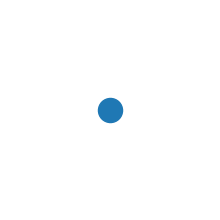

In [2]:
import networkx as nx

# Create and draw a single node graph
g = nx.Graph()
g.add_node(1)

plt.figure(figsize=(2,2))
nx.draw(g)
plt.show()

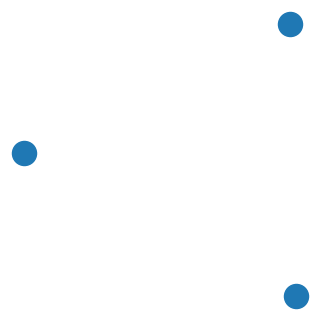

In [3]:
# Create and draw a three node graph

g.add_nodes_from([2, 3])

plt.figure(figsize=(3,3))
nx.draw(g)
plt.show()

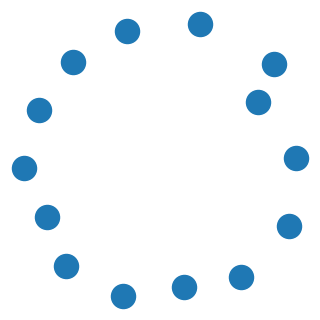

In [4]:
# Create and draw a fourteen node graph

g.add_nodes_from(range(4, 15))

plt.figure(figsize=(3, 3))
nx.draw(g)
plt.show()

In [5]:
# List nodes

print(g.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In the next cell, we add several nodes that demonstrate using
non-standard types. First, we add several functions to the graph, before
adding an open file handle. We next display the list of nodes in the
graph (showing the functions and open file handle). Following this, we
demonstrate how to remove nodes, first by removing the non-integer nodes
one at a time, before we remove several integer nodes in bulk.

In [6]:
# Build graph of mixed nodes, integers and functions

import math

g.add_node(math.pi)
g.add_node(math.exp)

fout = open('tmp.dat','w')

g.add_node(fout)

print(g.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 3.141592653589793, <built-in function exp>, <_io.TextIOWrapper name='tmp.dat' mode='w' encoding='UTF-8'>]


In [7]:
# Remove single node
g.remove_node(14)

# Remove non integer nodes
g.remove_node(math.pi)
g.remove_node(math.exp)
g.remove_node(fout)

#remove list of nodes
g.remove_nodes_from([11, 12, 13])

#show results
print(g.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


### Edges

On their own, nodes aren't very different than other data we have
analyzed. The major change with graph (or networkx) data is the
relationships between nodes. These relationships are modeled by using
edges. An edge can be undirected, meaning each node is the same in the
relationship, or the edge can be directed, which means there is a
preferred direction, of course the edge could be bi-directional. The
former is handled with an undirected graph, while the latter is handled
with a directed graph. As an example, when using Facebook, two
individuals are friends with each other (via a request), thus the edge
is undirected, whereas in Twitter one individual might follow another
individual, leading to a directed edge. Of course if two Twitter users
follow each other, we have a bi-directional edge (it is still
directional since other edge will all be directed, just possibly in one
direction.

In the following code cells, we demonstrate adding edges to a graph. We
first add a single edge, by listing the starting and ending nodes,
before adding multiple edges by supplying a list of tuples, where each
tuple provides the initial and ending node. Following this, we
demonstrate several different methods for drawing the same graph. These
techniques differ based on the mechanism by which nodes are laid out,
which can be affected by the edges in the graph.

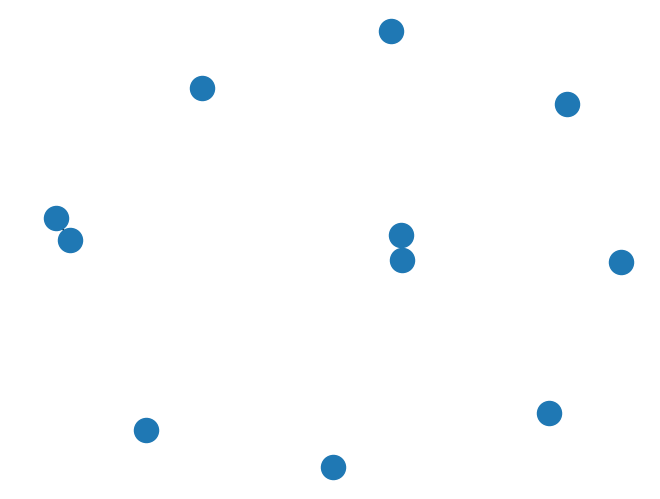

In [8]:
# Add single edge

g.add_edge(0, 1)

edgs = (3, 6)
g.add_edge(*edgs)

nx.draw(g)
plt.show()

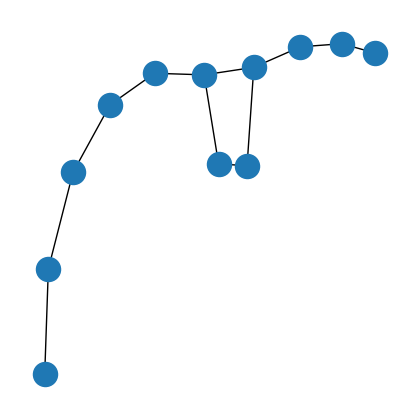

In [9]:
# Remove edge
g.remove_edge(0, 1)

# now add new edges en masse.
edgs = [(idx, idx + 1) for idx in range(g.order())]
g.add_edges_from(edgs)

# Draw graph
plt.figure(figsize=(4, 4))
nx.draw(g)
plt.show()

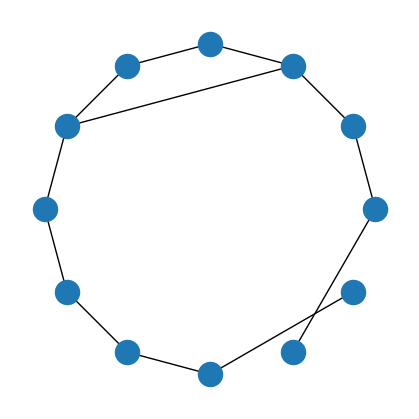

In [10]:
plt.figure(figsize=(4, 4))
nx.draw_circular(g)
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


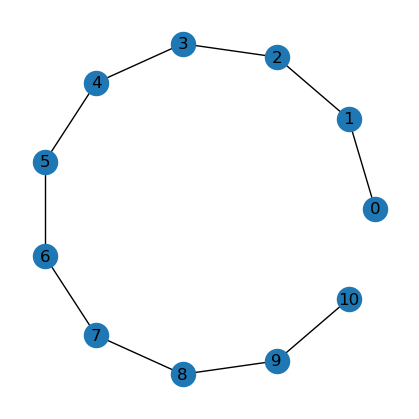

In [11]:
# Shortcut to make this graph
h = nx.path_graph(11)
print(h.nodes())

# Draw graph in circular format
plt.figure(figsize=(4, 4))
nx.draw_circular(h, with_labels=True)
plt.show()

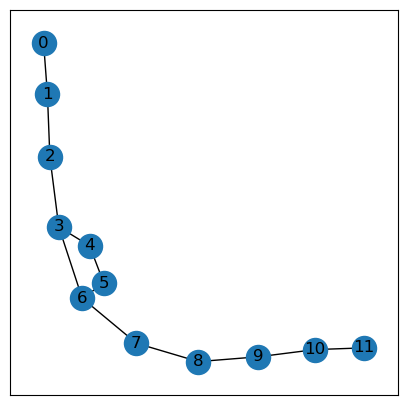

In [12]:
plt.figure(figsize=(5, 5))

# Draw graph in networkx format
nx.draw_networkx(g)
plt.show()

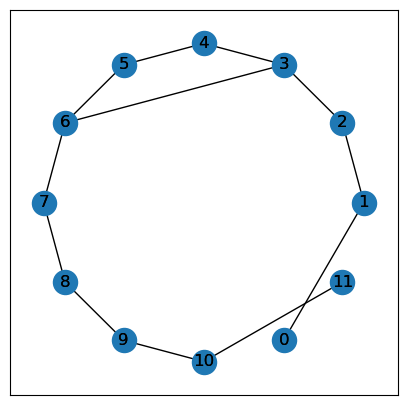

In [13]:
# Plot and specify node positions

plt.figure(figsize=(5, 5))
pos=nx.circular_layout(g)
nx.draw_networkx(g, pos)
nx.draw_networkx_labels(g, pos)
plt.show()

We also can create nodes by using string values. In the following cells,
we create an undirected graph and add five nodes with string values for
one through five, before adding different edges between these nodes,
creating a kite like graph. We next display basic graph properties, such
as the number of nodes and edges, the list of nodes and edges, and the
number of neighbors (via the edge connections) to several different
nodes.

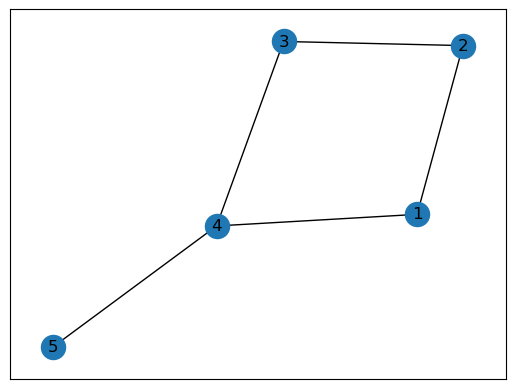

In [14]:
# Create a new arbitrary graph by hand, with string labels

g = nx.Graph()
g.add_node('1')
g.add_node('2')
g.add_node('3')
g.add_node('4')
g.add_node('5')
g.add_edge('1', '2')
g.add_edge('2', '3')
g.add_edge('3', '4')
g.add_edge('4', '1')
g.add_edge('4', '5')

# plot graph
nx.draw_networkx(g)
plt.show()

In [15]:
n_nds = g.order() # or g.number_of_nodes()
n_edgs = g.size() # or g.number_of_edges()
print('Graph has {0} nodes and {1} edges'.format(n_nds, n_edgs))

print('\nNodes in the Graph:')
print(g.nodes())

print('\nEdges in the Graph:')
print(g.edges())

nd = '4'

# The node degree is the number of edges adjacent to that node.
print('\nNeighbors to node #{0}'.format(nd))
print(g.degree(nd))

# List neihgbors
print('\nNeighbors to node #{0}'.format(nd))
print(g.neighbors(nd))

Graph has 5 nodes and 5 edges

Nodes in the Graph:
['1', '2', '3', '4', '5']

Edges in the Graph:
[('1', '2'), ('1', '4'), ('2', '3'), ('3', '4'), ('4', '5')]

Neighbors to node #4
3

Neighbors to node #4


### Attributes

Each entity in the graph, including the graph itself, can possess
individual attributes. For example, a node can have a `name` attribute,
while a different node can have the `name` attribute and a `type`
attribute. Attributes can be defined at creation time or at later times,
and some entities have _special_ attributes, such as the `weight`
attribute for an edge. The attributes of the graph, node, or edge are
maintained in a dictionary, and are thus accessed by using dictionary
access methods. In the following cells, we demonstrate how to create or
add attributes to the graph, to nodes, and to edges.

{'my_name': 'Test', 'type': 'Demo'}


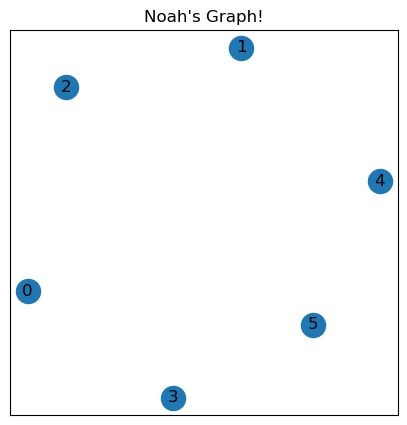

In [16]:
# Graph Attributes

# Specify an attribute at graph creation
g = nx.Graph(my_name = 'Test')
g.add_nodes_from(range(6))

# Add an attribute by using dictionary
g.graph['type'] = 'Demo'
print(g.graph)

# Set a default attribute
g.name = 'Noah\'s Graph!'

plt.figure(figsize=(5, 5))
nx.draw_networkx(g)
plt.title(g.name)
plt.show()

In [17]:
# Node attributes

nd = 6
g.add_node(nd, name='Robert')
print(nd, g.nodes[nd])
print('Node {0} name = {1}'.format(nd, g.nodes[nd]['name']))

nd = 5
g.nodes[nd]['name'] = 'Edward'
print(nd, g.nodes[nd])
print('Node {0} name = {1}'.format(nd, g.nodes[nd]['name']))

6 {'name': 'Robert'}
Node 6 name = Robert
5 {'name': 'Edward'}
Node 5 name = Edward


In [18]:
# Edge attributes

# Specify attribute at edge creation
g.add_edge('1', 6, rltn='friends')
print(g['1'][6])

# Special edge attribute is weight
g.add_edge('1', '3', weight=10.0)
print(g['1']['3'])

# Add multuple weight attribtues
g.add_edges_from([(idx, idx + 1, {'weight': (idx + 1) * 10})
                  for idx in range(g.order())])

{'rltn': 'friends'}
{'weight': 10.0}


[0, 1, 2, 3, 4, 5, 6, '1', '3', 7, 8, 9]


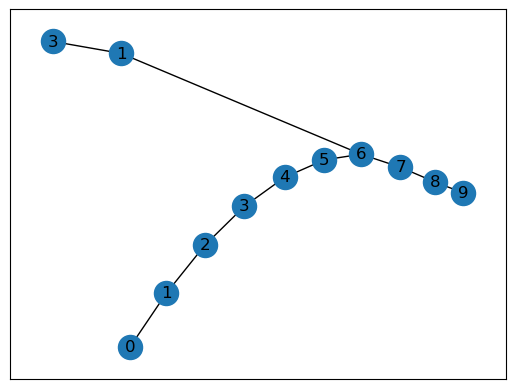

In [19]:
# Now list the nodes and draw the graph

print(g.nodes())

nx.draw_networkx(g)
plt.show()

### Matrix Representations

The relationships between nodes in a graph can be [represented
numerically][nla] as matrices. The two most used matrix representations
are the [adjacency matrix][wam] and the [incidence matrix][wim]. We
demonstrate these two matrices for the graph created in the previous few
code cells below. The adjacency matrix contains edges connecting node
`i` to node `j` with an entry in position `i`, `j` in the matrix, and
the value in the matrix can be the weight of the edge connecting the
two nodes. The incidence matrix, on the other hand, represents each node
as a row in the matrix and each edge as a column. Thus a value of one,
in a standard incidence matrix, shows where an edge connects to a node.
Note, how the adjacency matrix includes the weights of the edges
connecting different nodes.

[nla]: https://networkx.readthedocs.org/en/stable/reference/linalg.html
[wam]: https://en.wikipedia.org/wiki/Adjacency_matrix
[wim]: https://en.wikipedia.org/wiki/Incidence_matrix

In [20]:
# Adjacency Matrix
adj_mat = nx.adjacency_matrix(g)

print(adj_mat.todense())

[[ 0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [10.  0. 20.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 20.  0. 30.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 30.  0. 40.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 40.  0. 50.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 50.  0. 60.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 60.  0.  1.  0. 70.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0. 10.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 10.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 70.  0.  0.  0. 80.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 80.  0. 90.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 90.  0.]]


In [21]:
# Incidence Matrix

inc_mat = nx.incidence_matrix(g)
print(inc_mat.todense())

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Exercise 1: Graph Representations & Memory

Consider an unweighted graph that has n = 156317 vertices and m = 1059331 edges. Assume that in your computer each boolean is 1 byte, each integer is 4 bytes, and each pointer also 4 bytes. Calculate the amount of memory that is necessary to store this graph using an adjacency matrix representation and an adjacency lists representation. Which takes up more memory?

For an adjaceny matrix, the matrix itself is a representation of the interaction between two nodes. This is irrelavent of the number of edges in the system but rather the number of verticies. Thus, for an adjacent matrix, the memory need to generate all the matrices will be n*n. since each element inside the matrices are 1 byte, total memory will be n*n*1. For an adjacency list, each node has a pointer that is referenced within the list. Furthermore, each adjacency list points to the next adjacency list. to account for the bidirectionality of the edges at 1 byte, the memory needed for the edges can be represented as 2*m. Thus, adjacency list can be represented by 2*m(n+n) or 4*mn

In [22]:

n = 156317
m = 1059331
memory_for_matrix = n*n
memory_for_list = 4*m*n
print("The memory it takes to generate this adjacent matrix is: ",memory_for_matrix)
print("The memeory it takes to generate adjacency list is: ", memory_for_list)
if memory_for_list < memory_for_matrix:
    print("matrix takes more memory")
else:
    print("list takes more memory")


The memory it takes to generate this adjacent matrix is:  24435004489
The memeory it takes to generate adjacency list is:  662365775708
list takes more memory


### Directed Graphs

To this point, we have simply demonstrated undirected graphs. We now
introduce using directed graphs. The first change is the graph creation,
where we now use `nx.DiGraph()` to create a simple, directed graph.
Otherwise, we add edges in the same manner, albeit the direction is
assumed to be from the starting node to the ending node. If we need to
have directed edges going both ways, we simply add an edge with the
nodes reversed in order. These concepts are demonstrated in the
following cells, where we create and operate on directed graphs.

Nodes: ['1', '2', '3', '4', '5']
Edges: [('1', '2'), ('2', '3'), ('3', '4'), ('4', '1'), ('4', '5'), ('5', '4')]


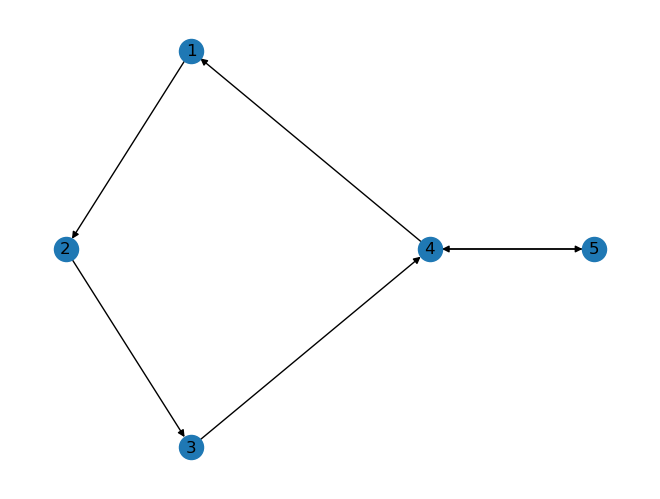

In [23]:
# Create a directed graph, add nodes and edges.
dg = nx.DiGraph()
dg.add_nodes_from(['1', '2', '3', '4', '5'])
dg.add_edge('1', '2')
dg.add_edge('2', '3')
dg.add_edge('3', '4')
dg.add_edge('4', '1')
dg.add_edge('4', '5')
dg.add_edge('5', '4')

# Display nodes, edges, and the graph.
print('Nodes:', dg.nodes())
print('Edges:', dg.edges())

nx.draw_spectral(dg, with_labels=True)
plt.show()

Nodes: [1, 2, 3, 4, 5]
Edges: [(1, 2), (2, 3), (3, 4), (3, 1), (3, 5)]

Number of edges entering a node:
[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]

Number of edges leaving a node:
[(1, 1), (2, 1), (3, 3), (4, 0), (5, 0)]


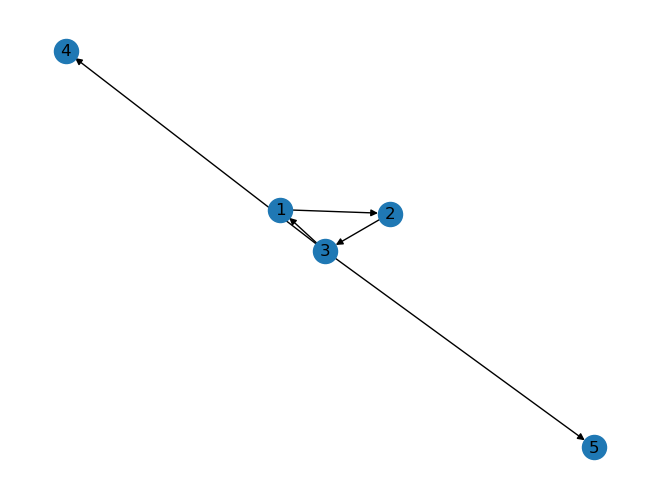

In [24]:
# Create directed graph, and add edges
# (which adds the corresponding nodes automatically).

dg = nx.DiGraph()
dg.add_edge(1, 2)
dg.add_edge(2, 3)
dg.add_edge(3, 4)
dg.add_edge(3, 1)
dg.add_edge(3, 5)

# Display nodes, edges, and directions.
print('Nodes:', dg.nodes())
print('Edges:', dg.edges())

print('\nNumber of edges entering a node:')
print(dg.in_degree())

print('\nNumber of edges leaving a node:')
print(dg.out_degree())

# Draw graph.
nx.draw(dg, with_labels=True)
plt.show()


Number of edges entering a node:
[(0, 0), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]

Number of edges leaving a node:
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 0)]

Weighted Number of edges entering a node:
[(0, 0), (1, 10), (2, 20), (3, 30), (4, 40), (5, 50), (6, 60), (7, 70), (8, 80)]

Weighted Number of edges leaving a node:
[(0, 10), (1, 20), (2, 30), (3, 40), (4, 50), (5, 60), (6, 70), (7, 80), (8, 0)]


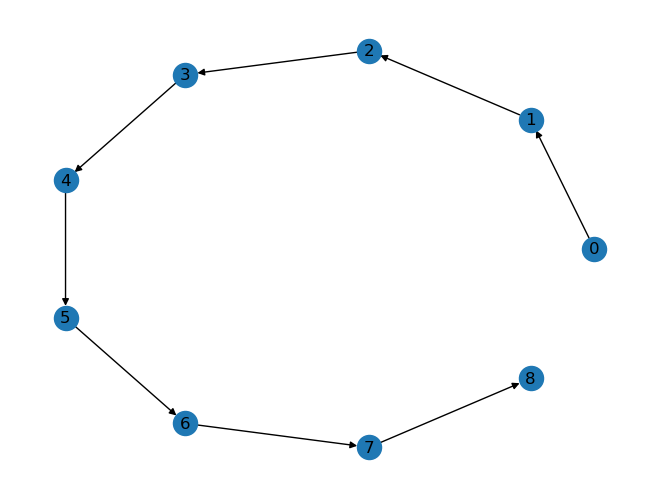

In [25]:
# Create directed graph, and display directed edges,
# and the weights of directed edges.

dg = nx.DiGraph()
dg.add_nodes_from(range(8))

dg.add_weighted_edges_from([(idx, idx + 1, (idx + 1) * 10)
                           for idx in range(dg.order())])

print('\nNumber of edges entering a node:')
print(dg.in_degree())

print('\nNumber of edges leaving a node:')
print(dg.out_degree())

print('\nWeighted Number of edges entering a node:')
print(dg.in_degree(weight='weight'))

print('\nWeighted Number of edges leaving a node:')
print(dg.out_degree(weight='weight'))

nx.draw_circular(dg, with_labels=True)
plt.show()

### Multigraphs

All graphs we have created and used within this notebook have been
simple, which simply means two nodes can be connected by at most one
edge. In some cases, however it makes sense to have multiple edges
connecting two nodes. The networkx library provides two graph types,
`MultiGraph` and `MultiDiGraph` for complex undirected or directed
graphs, respectively. Below we demonstrate using a multi-graph, however,
note that the multiple edges are not drawn by networkx. To visualize
large or more complex graphs, other tools, such as [Graphviz][gv], are
recommended.

[gv]: http://www.graphviz.org

[(0, 1), (1, 2), (1, 3), (1, 3), (2, 3), (3, 4), (3, 5), (3, 5), (4, 5), (5, 6), (5, 7), (5, 7), (6, 7), (7, 8)]


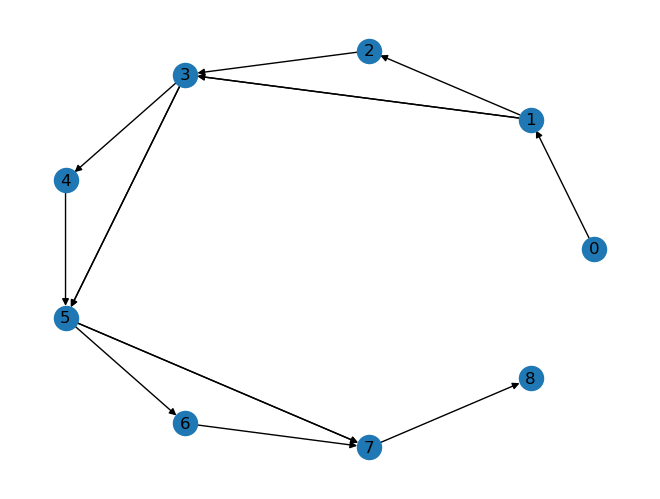

In [32]:
# Create directed multigraph and add nodes
mdg = nx.MultiDiGraph()
mdg.add_nodes_from(range(8))

# Now add edges, including repeat edges.
mdg.add_weighted_edges_from([(idx, idx + 1, (idx + 1) * 10)
                            for idx in range(mdg.order())])

mdg.add_weighted_edges_from([(1, 3, 0.5), (3, 5, 0.25), (5, 7, 0.125)])
mdg.add_weighted_edges_from([(1, 3, 1.5), (3, 5, 2.25), (5, 7, 3.125)])

# Display graph edges and the graph.
print(mdg.edges())
nx.draw_circular(mdg, with_labels=True)
plt.show()

## Exercise 2: Directed Graph Construction

- Make a directed graph with 20 integer nodes, and edges connecting every even integer node to the next odd integer node. Start from zero (Zero is an even number).
  - Node 0 has an edge pointing to node 1
  - Node 2 has an edge pointing to node 3
  - ...
  - Node 18 has an edge pointing to node 19

![UN01](https://github.com/nrflynn2/swe-molecular-sciences/blob/main/figures/L02_digraph_ex1.png?raw=1)

In [77]:
def get_circular_dg():
    '''
    Creates a directed graph with 20 integer nodes.
    Every even interger node is connected to the next odd integer node.

    Paramters
    ---------
    None

    Returns
    -------
    A networkx.Digraph instance.
    '''

    dg = nx.DiGraph()
    dg.add_nodes_from(range(20))
    dg.add_edges_from([(idx, idx + 1)
                                for idx in range(0,dg.order(),2)])
    return dg

In [78]:
dg = get_circular_dg()

[(0, 1), (2, 3), (4, 5), (6, 7), (8, 9), (10, 11), (12, 13), (14, 15), (16, 17), (18, 19)]


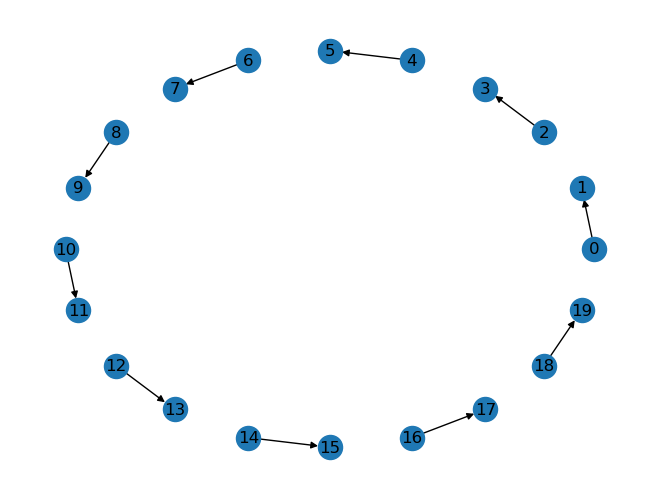

In [79]:
# Display graph edges and the graph to visually validate correct behavior.
print(dg.edges())
nx.draw_circular(dg, with_labels=True)
plt.show()

## Graph Analysis

Graphs can be large and
complex since they will are not simply data but also the relationships
between the data. As a result, the subject of graph or [network
analysis][wna] is quite complex and we will only skim the surface. In
this notebook we demonstrate basic graph traversal, computing properties
of nodes and edges, quickly building graphs by using generators, and
combining graphs. Finally, we will perform basic graph analysis before
exploring a sample graph that is included with the networkx library.

[wna]: https://en.wikipedia.org/wiki/Network_science

To demonstrate analyzing a graph, we first construct a simple path graph
of ten nodes, with the nodes connected sequentially. Afterwards, we
display the number of edges per node, the degree of each node, and the
weight of each edge.


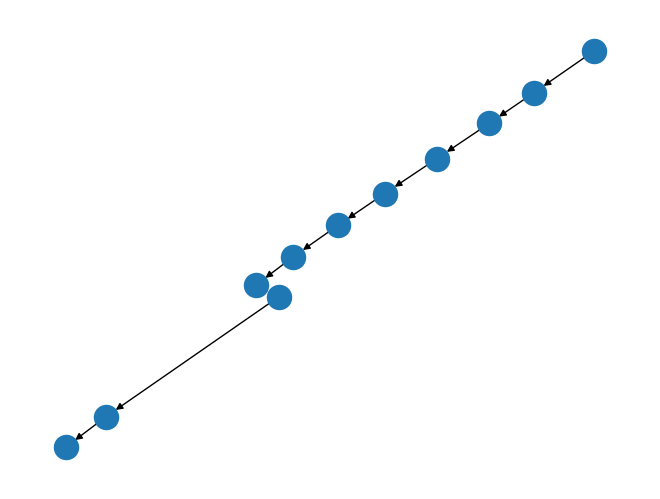

In [80]:
# Make a directed graph to traverse

dg = nx.DiGraph()
dg.add_nodes_from(range(10))

dg.add_weighted_edges_from([(idx, idx + 1, (idx + 1) * 10)
                           for idx in range(dg.order())])

nx.draw(dg)
plt.show()

In [81]:
# Display number of edges for each node

fmt_str = 'Node {0} has {1} edge(s)'
for node in dg.nodes():
    print(fmt_str.format(node, dg.degree(node)))

Node 0 has 1 edge(s)
Node 1 has 2 edge(s)
Node 2 has 2 edge(s)
Node 3 has 2 edge(s)
Node 4 has 2 edge(s)
Node 5 has 2 edge(s)
Node 6 has 2 edge(s)
Node 7 has 2 edge(s)
Node 8 has 2 edge(s)
Node 9 has 2 edge(s)
Node 10 has 1 edge(s)


In [82]:
# Display node degrees (connections)

fmt_str = 'Node {0} has degree {1}'
for node in dg.nodes():
    print(fmt_str.format(node, dg.degree(node)))

Node 0 has degree 1
Node 1 has degree 2
Node 2 has degree 2
Node 3 has degree 2
Node 4 has degree 2
Node 5 has degree 2
Node 6 has degree 2
Node 7 has degree 2
Node 8 has degree 2
Node 9 has degree 2
Node 10 has degree 1


In [83]:
# Display node connections with weights

fmt_str = 'Node {0} connected to Node {1} with Weight {2}'
for n, m, attr in dg.edges(data=True):
    print(fmt_str.format(n, m, attr['weight']))

Node 0 connected to Node 1 with Weight 10
Node 1 connected to Node 2 with Weight 20
Node 2 connected to Node 3 with Weight 30
Node 3 connected to Node 4 with Weight 40
Node 4 connected to Node 5 with Weight 50
Node 5 connected to Node 6 with Weight 60
Node 6 connected to Node 7 with Weight 70
Node 7 connected to Node 8 with Weight 80
Node 8 connected to Node 9 with Weight 90
Node 9 connected to Node 10 with Weight 100


### Graph Operations

Given one or more graphs, there are [different operations][nop] that can
be performed as supported by the networkx library. For example,
multiple graphs can be easily joined when there are no nodes in common
(`union`). If there are overlaps, they can be ignored  (`compose`) or
new nodes made to account for each duplicate (`disjoint_union`). The
complement (an inverse) of a graph can be constructed (`complement`),
subgraphs can be constructed by specifying nodes to extract from a
graph, and cartesian products of two graphs (`cartesian_product`).

[nop]: https://networkx.github.io/documentation/latest/reference/algorithms.operators.html

In [84]:
g1 = nx.Graph()
g1.add_nodes_from(range(6))

g2 = nx.Graph()
g2.add_nodes_from(range(6, 12))

g3 = nx.Graph()
g3.add_nodes_from(range(3, 11))

print('Nodes in Graph 1:', g1.nodes())
print('Nodes in Graph 2:', g2.nodes())
print('Nodes in Graph 3:', g3.nodes())

# Combine graphs with no overlaps
gu = nx.union(g1, g2)
print('\nNodes in Union of Graphs 1 and 2:', gu.nodes())

# Combine graphs with possible overlaps
gcm = nx.compose(g1, g3)
print('\nNodes in Composition of Graphs 1 and 3:', gcm.nodes())

# Make a subgraph, of specific nodes
gsg = nx.subgraph(gu, g3)
print('\nSubgraph (g3 nodes) from Union of Graphs 1 and 2:', gsg.nodes())

# Disjoint union treats each node as distinct.
gdu = nx.disjoint_union(g1, g3)
print('\nNodes in Disjoint Union of Graphs 1 and 3:', gdu.nodes())

print('\nCaretsian Product of Graphs 1 and 2')
gcp = nx.cartesian_product(g1, g2)

pp = pprint.PrettyPrinter(indent=2, depth=2, width=54, compact=True)

pp.pprint(list(gcp.nodes()))

Nodes in Graph 1: [0, 1, 2, 3, 4, 5]
Nodes in Graph 2: [6, 7, 8, 9, 10, 11]
Nodes in Graph 3: [3, 4, 5, 6, 7, 8, 9, 10]

Nodes in Union of Graphs 1 and 2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Nodes in Composition of Graphs 1 and 3: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Subgraph (g3 nodes) from Union of Graphs 1 and 2: [3, 4, 5, 6, 7, 8, 9, 10]

Nodes in Disjoint Union of Graphs 1 and 3: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

Caretsian Product of Graphs 1 and 2
[ (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11),
  (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11),
  (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11),
  (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11),
  (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11),
  (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11)]


Edges in Graph h: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]


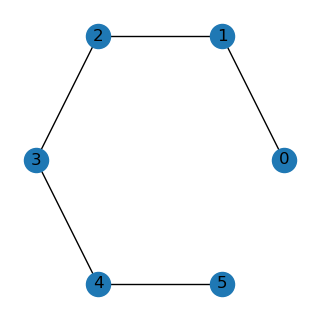

In [85]:
# Make a siomple path graph
h = nx.path_graph(6)
print('Edges in Graph h:', h.edges())

plt.figure(figsize=(3, 3))
nx.draw_circular(h, with_labels=True)
plt.show()

Edges in Complement of Graph h: [(0, 2), (0, 3), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5), (2, 4), (2, 5), (3, 5)]


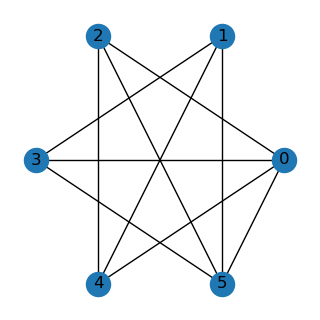

In [86]:
# Compute and display the graph complement
hc = nx.complement(h)
print('Edges in Complement of Graph h:', hc.edges())

plt.figure(figsize=(3, 3))
nx.draw_circular(hc, with_labels=True)
plt.show()

### Graph Generators

In some cases, we simply need to create a graph for specific analyses or
simple demonstrations. The networkx library provides _generators_ for a
number of different types of graphs. These generators can be classified
as _simple_, _classic_, or _stochastic_. The classic graphs are
frequently used as they include the _complete_ and _complete bipartite_
graphs, as well as the _barbell_ and _lollipop_ graphs. In the following
code cells, we use several of these different generators to quickly make
and display different types of graphs.

Peterson Graph Edges:

EdgeView([(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)])


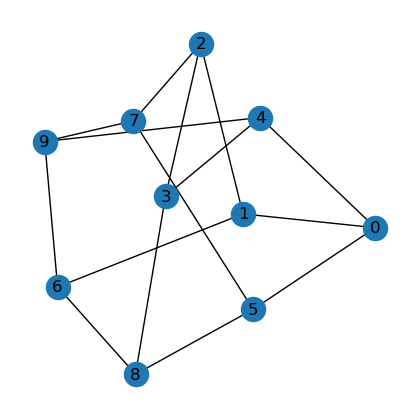

In [87]:
# Make a simple graph and display

pg = nx.petersen_graph()
print('Peterson Graph Edges:\n')
pp.pprint(pg.edges())

plt.figure(figsize=(4, 4))
nx.draw(pg, with_labels=True)
plt.show()

CG Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]


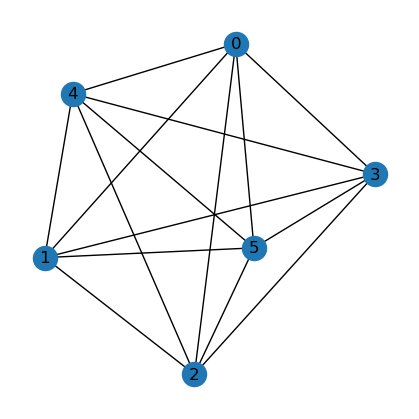

In [88]:
# Make a complete graph and display

cg = nx.complete_graph(6)
print('CG Edges:', cg.edges())

plt.figure(figsize=(4, 4))
nx.draw(cg, with_labels=True)
plt.show()

CBG Edges: [(0, 3), (0, 4), (1, 3), (1, 4), (2, 3), (2, 4)]


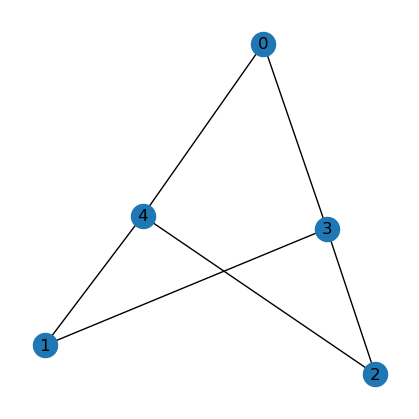

In [89]:
# Make a complete bipartite graph and display

cbg = nx.complete_bipartite_graph(3, 2)
print('CBG Edges:', cbg.edges())

plt.figure(figsize=(4, 4))
nx.draw(cbg, with_labels=True)
plt.show()

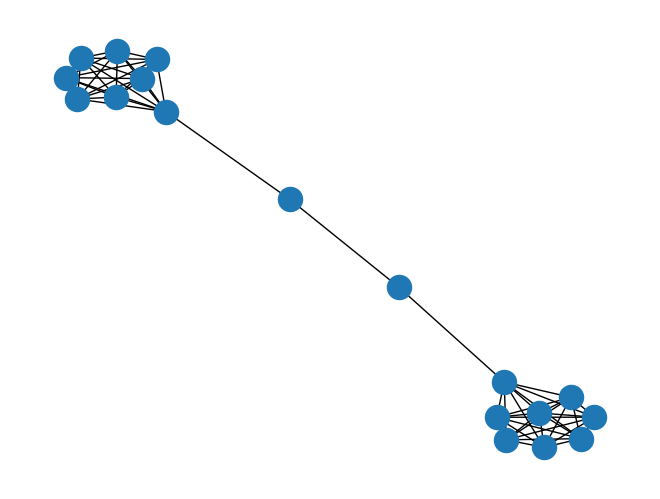

In [90]:
# Make a barbell graph and display

barbell = nx.barbell_graph(8, 2)
nx.draw(barbell)
plt.show()

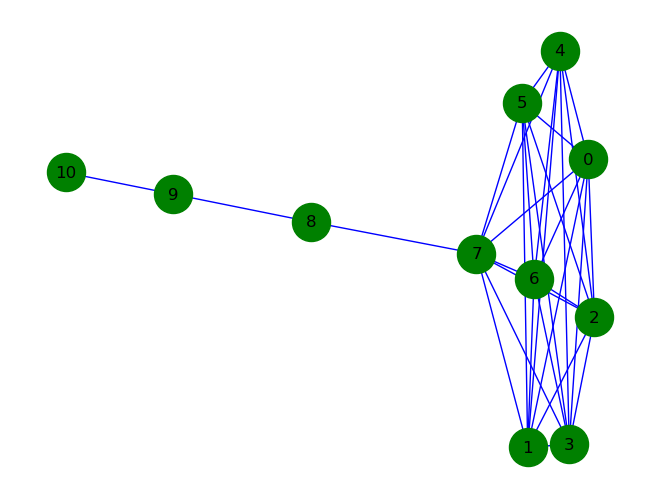

In [91]:
# Make a lollipop graph and display (changing the node and edge colors)

lg = nx.lollipop_graph(8, 3)

nx.draw(lg, with_labels=True, node_color='g', node_size=750, edge_color='b')
plt.show()

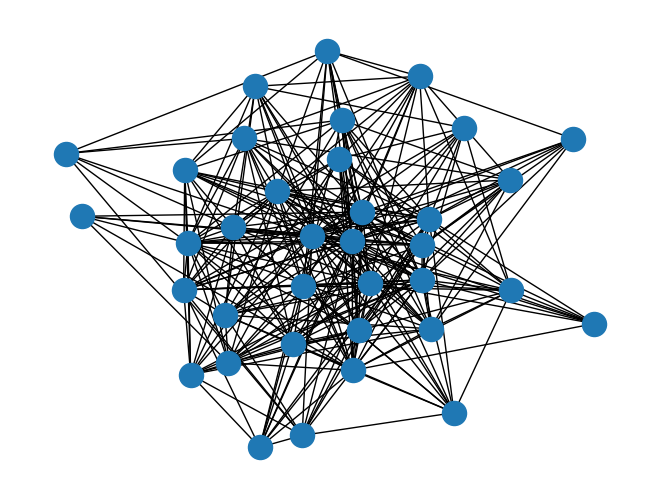

In [92]:
# Make a Barabási–Albert graph and display

ba = nx.barabasi_albert_graph(36, 12)
nx.draw(ba)
plt.show()

### Graph IO

When working with graphs, it is often important to save the data to
share or use later in another application. For example, when  working
with twitter data (social network analysis) or chembl data (chemical / biological network analysis), we often will want to cache the data to avoid rate limits. The networkx library [supports reading and
writing][nrw] graph data (or a subset of the graph data such as the
nodes or edges) to a number of different formats, including

- GML, or graph markup language
- GEXF, or Graph Exchange XML Format
- GraphML
- JSON
- GIS Shapefile

and of course, you can also pickle graphs. Below we demonstrate this
capability, by first creating a simple graph and writing it to a
temporary file. We demonstrate this file exists by using the Unix list
files command (`ls -la`), before reading the graph into a new variable
and displaying the recovered graph.

[nrw]: https://networkx.github.io/documentation/latest/reference/readwrite.html

In [93]:
tcg = nx.complete_graph(12)
nx.write_gml(tcg, 'tmp-cg.dat')

In [94]:
!ls -la tmp-cg.dat

-rw-r--r-- 1 zifang zifang 3042 Sep 24 19:33 tmp-cg.dat


CG Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (7, 8), (7, 9), (7, 10), (7, 11), (8, 9), (8, 10), (8, 11), (9, 10), (9, 11), (10, 11)]


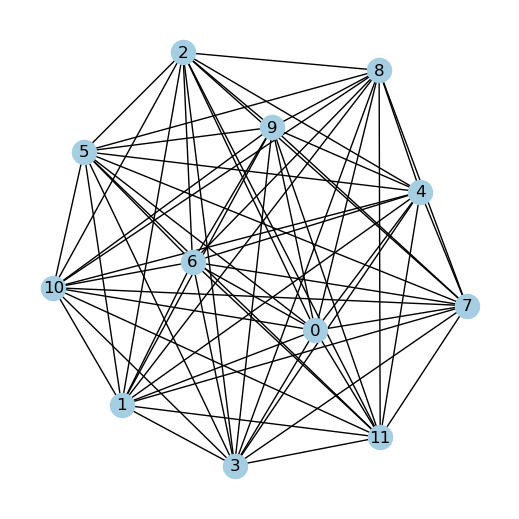

In [95]:
ncg = nx.read_gml('tmp-cg.dat')

print('CG Edges:', tcg.edges())

clrs = sns.color_palette("Paired")

plt.figure(figsize=(5, 5))
nx.draw(tcg, with_labels=True, node_color=clrs[0])
plt.show()

### Graph Analysis

So far, we have only created graphs. The power of network analysis,
however, is in analyzing the properties of graphs to gain insight into
the underlying data. This can include finding clusters of nodes,
computing path distances between nodes, and finding properties of the
entire graph or of collections of nodes. The networkx library provides a
wide range of basic graph analysis methodology, which is demonstrated in
the rest of this notebook. First, we analyze the lollipop graph to
identify clusters. In this case, there is one cluster and points are
inside it (value of 1), outside (value of 0), or on the border
(fractional value). Next, we create a special graph and identify the
connected components.

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 0.75, 8: 0, 9: 0, 10: 0}


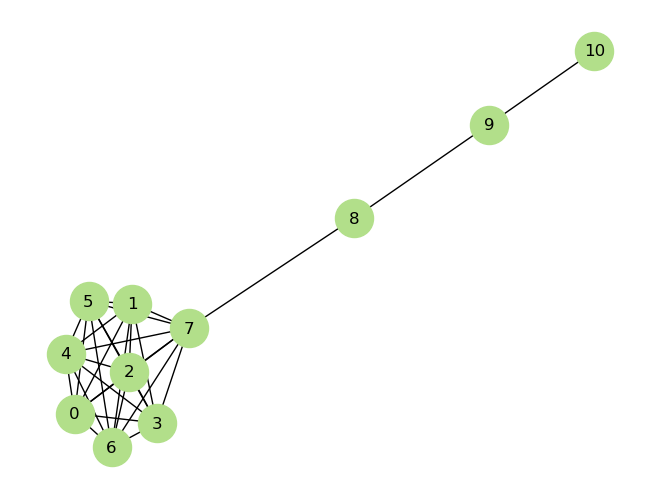

In [96]:
# Apply clustering to lollipop graph
print(nx.clustering(lg))

nx.draw(lg, with_labels=True, node_color=clrs[2], node_size=750)
plt.show()

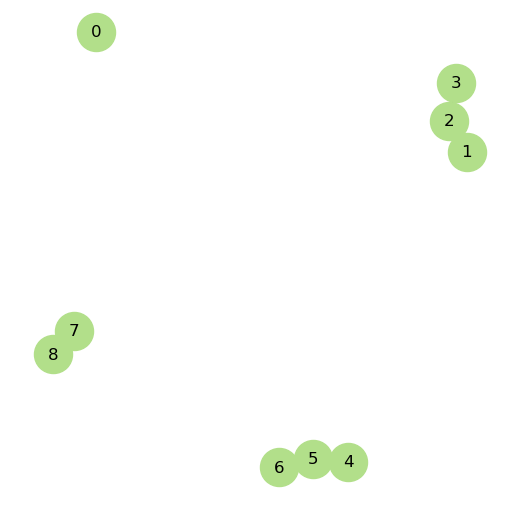

Connected Group 0 has 1 nodes: {0}
Connected Group 1 has 3 nodes: {1, 2, 3}
Connected Group 2 has 3 nodes: {4, 5, 6}
Connected Group 3 has 2 nodes: {8, 7}


In [97]:
g = nx.Graph()
g.add_nodes_from(range(8))
g.add_edges_from([(1, 2), (2, 3), (4, 5), (5, 6), (7, 8)])

plt.figure(figsize=(5, 5))
nx.draw(g, with_labels=True, node_color=clrs[2], node_size=750)
plt.show()

for idx, nds in enumerate(nx.connected_components(g)):
    print('Connected Group {0} has {1} nodes: {2}'.format(idx, len(nds), nds))

The networkx library has a number of build-in graph analysis methods,
which can be used to find properties of the graph, such as the `center`
or `radius`, but also to compute paths between nodes. For example, one
commonly required task is to compute the shortest path between nodes,
which can include weights from the edges (which might be miles between
cities). In the following cll, we modify the previous graph to make a
special graph that has nodes with varying path lengths. In the following
cells, we compute and display several graph properties before computing
the shortest paths between each pair of nodes. Finally, we compute the
number of paths of a given length that connect all pairs of nodes.


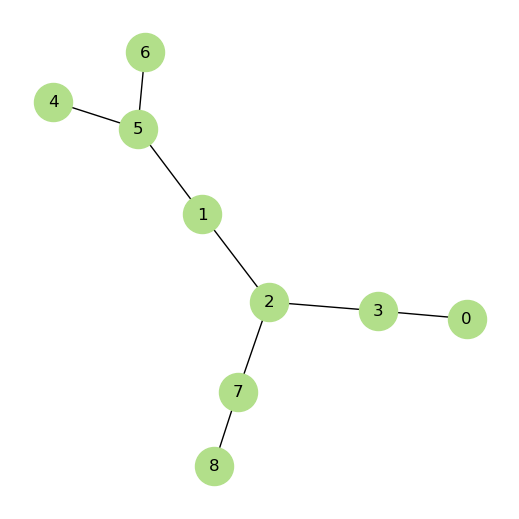

In [98]:
# Compute Shortest Paths

g.add_edges_from([(0, 3), (2, 7), (1, 5)])

plt.figure(figsize=(5, 5))
nx.draw(g, with_labels=True, node_color=clrs[2], node_size=750)
plt.show()

In [99]:
print("Graph Radius: {0:3.1f}".format(nx.radius(g)))
print("Graph Diameter: {0:3.1f}".format(nx.diameter(g)))
print("Graph Eccentricity: {0}".format(nx.eccentricity(g)))
print("Graph Center: {0}".format(nx.center(g)))
print("Graph Periphery: {0}".format(nx.periphery(g)))
print("Graph Density: {0:4.3f}".format(nx.density(g)))

Graph Radius: 3.0
Graph Diameter: 5.0
Graph Eccentricity: {0: 5, 1: 3, 2: 3, 3: 4, 4: 5, 5: 4, 6: 5, 7: 4, 8: 5}
Graph Center: [1, 2]
Graph Periphery: [0, 4, 6, 8]
Graph Density: 0.222


In [100]:
path_lengths=[]

print("Starting Node {End Node : Length, ... }")
for node in g.nodes():
    spl= nx.single_source_shortest_path_length(g, node)
    print('{0} {1}'.format(node, spl))
    for path in spl.values():
        path_lengths.append(path)

print("\nAverage shortest Path Length = {0:4.3f}".format(sum(path_lengths)/len(path_lengths)))

Starting Node {End Node : Length, ... }
0 {0: 0, 3: 1, 2: 2, 1: 3, 7: 3, 5: 4, 8: 4, 4: 5, 6: 5}
1 {1: 0, 2: 1, 5: 1, 3: 2, 7: 2, 4: 2, 6: 2, 0: 3, 8: 3}
2 {2: 0, 1: 1, 3: 1, 7: 1, 5: 2, 0: 2, 8: 2, 4: 3, 6: 3}
3 {3: 0, 2: 1, 0: 1, 1: 2, 7: 2, 5: 3, 8: 3, 4: 4, 6: 4}
4 {4: 0, 5: 1, 6: 2, 1: 2, 2: 3, 3: 4, 7: 4, 0: 5, 8: 5}
5 {5: 0, 4: 1, 6: 1, 1: 1, 2: 2, 3: 3, 7: 3, 0: 4, 8: 4}
6 {6: 0, 5: 1, 4: 2, 1: 2, 2: 3, 3: 4, 7: 4, 0: 5, 8: 5}
7 {7: 0, 8: 1, 2: 1, 1: 2, 3: 2, 5: 3, 0: 3, 4: 4, 6: 4}
8 {8: 0, 7: 1, 2: 2, 1: 3, 3: 3, 5: 4, 0: 4, 4: 5, 6: 5}

Average shortest Path Length = 2.420


In [101]:
# Accumulate number of paths in graph of given length

lengths = {}
for path in path_lengths:
    if path in lengths:
        lengths[path] += 1
    else:
        lengths[path] = 1

print("Length : Number of Paths")
for length in sorted(lengths.keys()):
    print('  {0}    :    {1:2d}'.format(length, lengths[length]))

Length : Number of Paths
  0    :     9
  1    :    16
  2    :    18
  3    :    16
  4    :    14
  5    :     8



Another important concept in graphs is natural groupings, which are
known as _cliques_. The networkx library provides methods to find
cliques, which may or may not be useful for a particular analysis (in
other words, you may need have to provide specific functionality  if
the networkx methods are not sufficient). Below we compute the number of
_maximal_ cliques and then display the different cliques.

In [102]:
print('Total number of maximal cliques = {0}'.format(nx.number_of_cliques(g)))

for clique in nx.find_cliques(g):
    print(clique)

Total number of maximal cliques = {0: 1, 1: 2, 2: 3, 3: 2, 4: 1, 5: 3, 6: 1, 7: 2, 8: 1}
[0, 3]
[2, 1]
[2, 3]
[2, 7]
[4, 5]
[5, 1]
[5, 6]
[8, 7]


### Demo Graph

The networkx library comes with several data sets, which can be used to
demonstrate basic graph analysis. Below we use one of these data sets,
the _Davis Women's club_ data. This data has relationships between the
different women, and also who attended which club event. Below we first
display a histogram of the number of connections between the women
before computing the number of friends for each woman (we use a
bipartite graph to simplify this calculation). Finally, we conclude this
demo by displaying the graph and computing the number of shard
connections, via the number of meetings each woman attended and the
number of other women at those meetings.


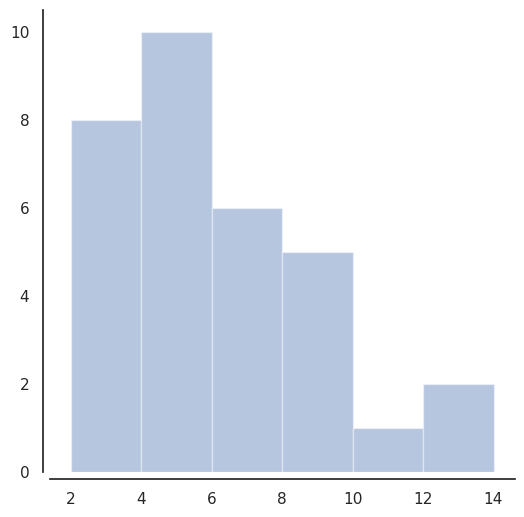

In [103]:
sample_graph = nx.davis_southern_women_graph()

edges = [v for k, v in nx.degree(sample_graph)]

plt.figure(figsize=(6, 6))
sns.set(style='white')
sns.distplot(edges, kde=False)
sns.despine(offset=5)

In [104]:
import networkx.algorithms.bipartite as bipartite

women = sample_graph.graph['top']

# We make a bipartite graph linking each individual woman to the other women
bpg = bipartite.projected_graph(sample_graph, women)
print('{0:25s} : # Friends'.format('Member'))
print(40*'-')

for woman in women:
    print('{0:25s} : {1:2d}'.format(woman, bpg.degree(woman)))

Member                    : # Friends
----------------------------------------
Evelyn Jefferson          : 17
Laura Mandeville          : 15
Theresa Anderson          : 17
Brenda Rogers             : 15
Charlotte McDowd          : 11
Frances Anderson          : 15
Eleanor Nye               : 15
Pearl Oglethorpe          : 16
Ruth DeSand               : 17
Verne Sanderson           : 17
Myra Liddel               : 16
Katherina Rogers          : 16
Sylvia Avondale           : 17
Nora Fayette              : 17
Helen Lloyd               : 17
Dorothy Murchison         : 16
Olivia Carleton           : 12
Flora Price               : 12


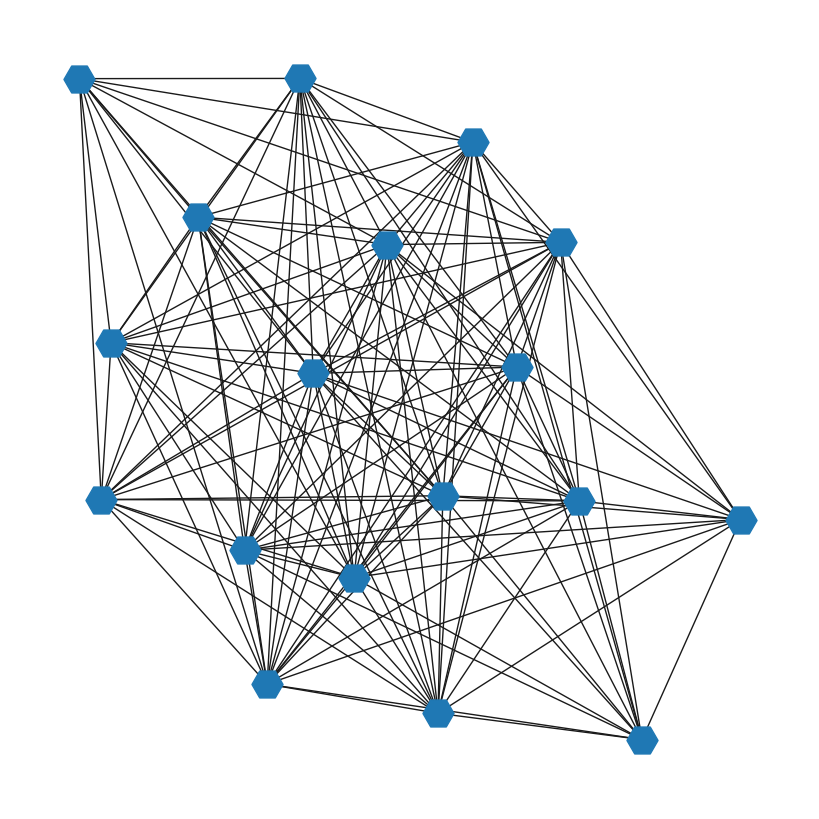

In [105]:
# Plot the connections between the women.

plt.figure(figsize=(8, 8))

pos = nx.spring_layout(bpg)
nx.draw(bpg, node_size=500, node_color=clrs[1], node_shape='H')
plt.show()

In [106]:
# Make bipartite graph that weights connections between an individual
# woman and the other women by the number of shared contacts

bpwg = bipartite.weighted_projected_graph(sample_graph, women)

print('{0:25s} : # Friend Meetings'.format('Member'))
print(40*'-')

for woman in women:
    print('{0:25s} : {1:2d}'.format(woman, bpwg.degree(woman, weight='weight')))

Member                    : # Friend Meetings
----------------------------------------
Evelyn Jefferson          : 50
Laura Mandeville          : 45
Theresa Anderson          : 57
Brenda Rogers             : 46
Charlotte McDowd          : 24
Frances Anderson          : 32
Eleanor Nye               : 36
Pearl Oglethorpe          : 31
Ruth DeSand               : 40
Verne Sanderson           : 38
Myra Liddel               : 33
Katherina Rogers          : 37
Sylvia Avondale           : 46
Nora Fayette              : 43
Helen Lloyd               : 34
Dorothy Murchison         : 24
Olivia Carleton           : 14
Flora Price               : 14


## Exercise 2: Zachary's Karate Club



We use [Zachary's Karete Club](https://networkx.github.io/documentation/latest/reference/generated/networkx.generators.social.karate_club_graph.html) data set. You can read more about it on [Wikipedia](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) or refer to the original paper [Zachary (1997)].

According to Wikipedia:

<blockquote>
A social network of a karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972. The network captures 34 members of a karate club, documenting 78 pairwise links between members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi, members from the other part found a new instructor or gave up karate. Basing on collected data Zachary assigned correctly all but one member of the club to the groups they actually joined after the split.
</blockquote>

In [107]:
g = nx.karate_club_graph()

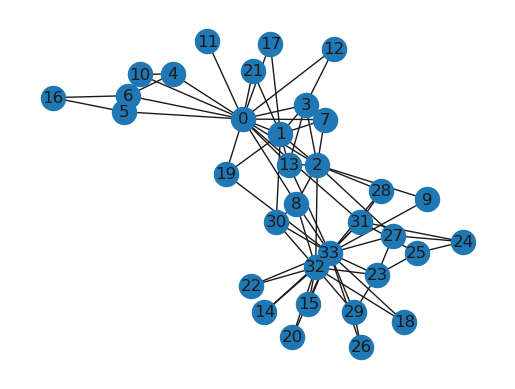

In [108]:
fig, ax = plt.subplots()
nx.draw(g, ax=ax, with_labels = True)
plt.show()

## Exercise 3: Compute the Degree of each Node

Compute the degree of each node in the graph. To do this, implement the get_degree function. A working implementation will pass the assertion statements a few cells down.

In [118]:
def get_degree(graph):
    '''
    Computes the degree of each node.

    Paramters
    ---------
    graph: A networkx.Graph instance.

    Returns
    -------
    A dict of foramt {node: degree}
    '''

    # YOUR CODE HERE
    result = {}

    #TODO: Iterate over each node in the graph, compute the degree of the node, and store it in the dictionary at the index of the node
    for i in graph.nodes():
        idgree = graph.degree(i)
        result[i] = idgree
    return result

In [119]:
degree = get_degree(g)
print('Node  Degree')
for node in degree:
    print('{0:4d} {1:7d}'.format(node, degree[node]))

Node  Degree
   0      16
   1       9
   2      10
   3       6
   4       3
   5       4
   6       4
   7       4
   8       5
   9       2
  10       3
  11       1
  12       2
  13       5
  14       2
  15       2
  16       2
  17       2
  18       2
  19       3
  20       2
  21       2
  22       2
  23       5
  24       3
  25       3
  26       2
  27       4
  28       3
  29       4
  30       4
  31       6
  32      12
  33      17


In [120]:
# For full points on exercise 3, your computation should pass the following assertion
assert list(degree.keys()) == list(range(34))
assert degree[0] == 16
assert degree[1] == 9
assert degree[32] == 12
assert degree[33] == 17

We see that two people (Nodes 0 and 33) have well above the average number of degrees. Node 0 corresponds to Mr. Hi, and node 33 corresponds to John A (or "officer"). Node 32 has many friends but not as many as those two. To visualize this, we color each node according to whether it is a friend of node 0 or node 33.

If someone is a friend of both 0 and 33, classify the node as a friend of node 33.

By coloring the friends of node 0 and node 33, we can see that the club has two subgroups based on social relationships!

![UN02](https://github.com/nrflynn2/swe-molecular-sciences/blob/main/figures/L02_karate_ex2.png?raw=1)

## Exercise 4: Fun with Graphs

In the preceding cells, we introduced several basic graph analysis
techniques.

Make a new graph with 12 nodes. Add edges between all pairs of even nodes. Add edges between all pairs of odd nodes. Next add edges between nodes that are evenly divisible by three.

1. Plot your new graph.
2. Compute the clustering on this new graph. Describe the results and if it makes sense.
3. Compute graph statistics such as `radius` and `density`. What were the computed values?

In [212]:
ex4 = nx.DiGraph()
ex4.add_nodes_from(range(0,12))
odds = list(range(1,12,2))
evens = list(range(0,12,2))
d3 = list(range(0,12,3))
for o in odds:
    for o_2 in odds:
        if o != o_2:
            ex4.add_edge(o, o_2)
for e in evens:
    for e_2 in evens:
        if e != e_2:
            ex4.add_edge(e,e_2)
for d in d3:
    for d_2 in d3:
        if d != d_2:
            ex4.add_edge(d,d+1)

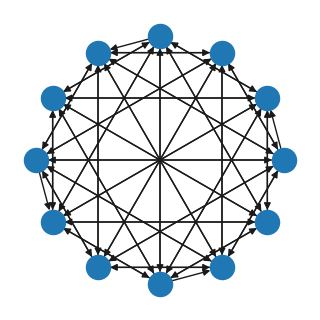

In [213]:
plt.figure(figsize=(3, 3))
nx.draw_circular(ex4)
plt.show()

In [214]:
# calculating clustering
print(nx.clustering(ex4))
    # the result from this illustrates that these nodes are not in a cluster. 
    # this makes sense as they are interconnected with eachother through unweighted edges. so they are basically all evenlly spaced
print(nx.radius(ex4))
print(nx.density(ex4))

{0: 0.8, 1: 0.8, 2: 1.0, 3: 0.8, 4: 0.8, 5: 1.0, 6: 0.8, 7: 0.8, 8: 1.0, 9: 0.8, 10: 0.8, 11: 1.0}
2
0.48484848484848486


## War Story: Traversals on Drug Metabolism Networks

### Idiosyncratic Adverse Drug Reactions

Adverse drug reactions (ADRs) are a core limiting factor in the development of drugs and their distribution. ADRs account for 4.9--7.7\% of hospital admissions and are a leading cause of death in the U.S. Moreover, vulnerable populations face high risks -- 39\% of ADRs in pediatric patients end up being life--threatening or fatal and 11.4--35.5\% of geriatric hospital admissions are due to drug--related incidences. Incidence of ADRs in the USA are estimated to cost up to 30.1 billion dollars annually due to  increased hospitalization, prolongation of hospital stay, and visits to emergency departments.

Approximately 10--15\% of ADRs are dose-independent and idiosyncratic (IADRS), which makes them notoriously difficult to plan for and unable to be evaded by simple dose adjustments. IADRs occur at very low frequencies of 1 in 10,000 to 1 in 100,000, allowing them to evade detection until the drug has gained increased exposure at large population levels that are not tractable in clinical trials. IADRs commonly affect the skin, blood cells, and especially the liver. At least 17\% of liver transplant cases and 50\% of acute liver failure cases can be traced to IADRs. Consequently, IADRs are a major reason for drug clinical trial termination and drug-induced liver injury, which is the leading cause of drug withdrawal from the market. Partly due to a poor ability to screen early on for IADRs, one in five drugs that has been on the market for at least two years ends up being withdrawn or tagged with a black box warning. Metabolic activation of an extraneous drug, or xenobiotic, into a reactive metabolite, is a common precursor of ADRs.

### Understanding Reactive Metabolite Formation

In silico prediction of reactive metabolites is an important cheminformatics problem.
Reactive metabolite formation is an unfortunate consequence of drug-clearing defense mechanisms, i.e., metabolism.
Metabolism is generally beneficial, making drugs more hydrophilic and easier to excrete.
However, metabolism can transform drugs into pernicious reactive metabolites that may conjugate to DNA or off-target proteins and result in adverse events.
In particular, P450 enzymes are highly relevant to bioactivation processes surrounding drugs, as they collectively have more substrates than any other enzymes and several of their reaction products have strong electrophilic properties.
Reactive metabolites are significant drivers of drug candidate attrition and market withdrawal -- 65% of drugs associated with IADRs have been shown to produce reactive metabolites, primarily resulting in adverse outcomes in conditions that affect the blood, liver, and skin.
Detection of reactive metabolite formation during metabolism of a drug to known structural end points could be leveraged to engineer rational modifications that bypass formation of the reactive metabolite in favor of benign metabolic pathways.

![UN03](https://github.com/nrflynn2/swe-molecular-sciences/blob/main/figures/L02_RMs_Adverse_Outcomes.png?raw=1)

Computational methods are high-throughput and cheap to perform to screen thousands to millions of compounds for potentially toxic molecules during the early stages of the drug development pipeline.
Commonly used computational methods focus on detecting and structurally characterizing reactive metabolite-biomolecule adducts or predicting sites on a drug molecule that are liable to form reactive metabolites.
However, such methods are often only concerned with the structure of the initial drug molecule (i.e., the starting state) or of the adduct formed when a biomolecule conjugates to a reactive metabolite (i.e., the ending state).
This is problematic because the majority of drug molecules require more than one metabolic transformation to form a reactive metabolite.
Thus, these methods are likely to miss intermediate metabolites that may lead to subsequent reactive metabolite formation.
To address these shortcomings, we will consider XenoNet, which was a metabolic network predictor that receives an input substrate molecule and optional target metabolite(s) and generates a metabolic network.
In the metabolic network, molecules are nodes and directional edges convey metabolic transformations.
The metabolic network is generated by enumerating pathways, or sequences of intermediate metabolites, between the substrate and targets and predicting the probability of each metabolic transformation.

XenoNet works by iteratively chaining together two types of models: Site of metabolism (SOM) models, which identify atoms, or bonds, that are liable to be metabolized, and metabolite structure inference models, which can infer the structures of potential metabolites formed during metabolism of a given molecule.

![UN04](https://github.com/nrflynn2/swe-molecular-sciences/blob/main/figures/L02_SOM_models.png?raw=1)

![UN05](https://github.com/nrflynn2/swe-molecular-sciences/blob/main/figures/L02_structure_inference_models.png?raw=1)

XenoNet uses a deep learning phase I and phase II metabolism model to predict sites of metabolism. It uses a rule-based structure inference model (reliant on various path-finding graph algorithms) to infer possible metabolite structures that are one metabolic step away, as well as the specific SOMs and the corresponding metabolic transformations that act on those SOMs to produce the inferred metabolite.

Metabolic pathways are explored in a depth-first manner, where the structure inference algorithm is applied iteratively to generate a tree of potential pathways that span multiple metabolic pathways, eventually resulting in a final graph structure where inferred pathways are saved if they meet user-defined criteria (as visualized below).

![UN06](https://github.com/nrflynn2/swe-molecular-sciences/blob/main/figures/L02_DFS_build_network.png?raw=1)

With respect to inferring intermediate, reactive metabolite structures, all pathways that link a user-defined starting molecule and user-defined target molecule(s) are saved. Through the application of the SOM model, the likelihood of each step in a pathway can then be computed.
XenoNet's weighted metabolic pathways are stored using a custom graph-based data structure where each molecule is a node, and each metabolic transformation is an edge.
This network object supports additional functionality, such as the ability to compute the likelihoods of paths and metabolites in the network, output a subnetwork of most important metabolites by some metric, compute network centrality measures, etc. In addition, the network object readily supports conversion to a NetworkX MultiDiGraph class object for further utility.

![UN07](https://github.com/nrflynn2/swe-molecular-sciences/blob/main/figures/xenonet_high_level.png?raw=1)

![UN08](https://github.com/nrflynn2/swe-molecular-sciences/blob/main/figures/xenonet_high_level_2.png?raw=1)


### Problem from an Algorithmic Perspective

Consider the example network output provided by XenoNet.

![UN09](https://github.com/nrflynn2/swe-molecular-sciences/blob/main/figures/L02_xenonet_example_1.png?raw=1)

Now consider the following network.

![UN10](https://github.com/nrflynn2/swe-molecular-sciences/blob/main/figures/L02_xenonet_example.png?raw=1)

These networks can get quite large, much larger and complex than what it shown here. From an algorithmic perspective, traversing the whole tree has time complexity $O(n^d)$ -- intractable to search the whole tree.
- n = number of metabolites per molecules
- d = depth of search

In practice, conducting full network construction is not tractable for $d \geq 3$


How can algorithms (and other methods) help us? Some ideas:
1. Algorithmic variants
  - Bidirectional search. For network inputs that have a defined target, search from the start while, in parallel, searching in reverse from the target(s). Requires implement retrosynthetic algorithms to enact the structure inference process in reverse + some tricky adaptations to consolidate overlaps.
  - Greedy search. Use the SOM model predictinos and limit future searches to only the top $n$ metabolites at a given depth in the tree. If don't want this to be deterministic, then stochastically sample from possible next metabolites to conduct the search from by using their associated SOM model prediction (normalized) as a proxy for a probability.
  - Beam search. A greedy approach selects the most probable metabolites at each search step, but is problematic because it is impossible to know a priori which chosen metabolite will lead to the more promising future. The effect of choosing a metabolite may not be obvious until several search steps later and early choice of the wrong metabolite may cumulatively lead to a poorer overall path probability over time. Performing an exhaustive search, retaining all choices, and forking the network with every possible molecule under consideration at a given step rapidly blows up. Instead, retain only the top $N$ scoring forks at each search step. We choose the top $N$ based on the product of probabilities of all metabolites along the path constructed so far.

![UN11](https://github.com/nrflynn2/swe-molecular-sciences/blob/main/figures/L02_beam_search.png?raw=1)

2. Heuristics to reduce search space (e.g., reduce $n$)
  - Substructure search. If you know the start structure and the target structure(s), then you can narrow down sites of metabolism to consider from all sites in a molecule to only those sites that are different between the start and target structures.

![UN12](https://github.com/nrflynn2/swe-molecular-sciences/blob/main/figures/L02_search_heuristics.png?raw=1)

3. Iterative construction.
  - Machine learning based. We can build out an initial version of the network, say at a depth limit of 2, then extract an "important" (where important can mean whatever we want it to mean) subnetwork via a deep learning model. Then, resume the network construction process on the subnetwork. Idea is build out initial network, prune irrelevant elements, then continue building out.
  - Graph theory based. Do similar as above, but use classic centrality measures to score "important" metabolites and links.

![UN13](https://github.com/nrflynn2/swe-molecular-sciences/blob/main/figures/L02_subnet_extraction_main_idea.png?raw=1)

## Exercise 5: Trade-offs

Several of the proposed solutions enact a trade-off that reduces the search time but might result in an output network that captures less of the full picture. Which method do you think reduces the search time the most? Which method do you think would result in greatest reduction in the quality of the network output? Why for both? Feel free to make any additional assumptions, but do state them. There is not one right answer and this question is graded primarily on your ability to justify a choice.

I belive method that will reduce search time the heuristic approach. This is because with a starting structure, we know the characteristics and how the molecule behaves. Finding substructures for the molecule allow us to improve upon it and maybe fix issues associated with it. However, this narrows down the scope as the molecules we generate will be closely associated with the properties of our starting molecule. Beam search will definetly reduce the quality of the network output. this is because there's no initial baseline to limit the search, if the search begins with junk you'll end up with junk. that's why I think beam search will be the worst.